<a href="https://colab.research.google.com/github/kkamal11/MLT/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

We wil implement both hard-margin SVMs and soft-margin SVMs from scratch on a toy dataset. Apart from `NumPy`, we would need to take the help of `SciPy` for solving the quadratic programming problem.

## Hard-Margin SVM

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 15

In [ ]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1, 
             -1, -1, -1, -1, -1])

### Understand the data

$\mathbf{X}$ is a data-matrix of shape $(d, n)$. $\mathbf{y}$ is a vector of labels of size $(n, )$. Specifically, look at the shapes of the arrays involved.

In [ ]:
print(X.shape)
print(y.shape)

(2, 20)
(20,)


In [ ]:
X.T

array([[ 1, -3],
       [ 1,  0],
       [ 4,  1],
       [ 3,  7],
       [ 0, -2],
       [-1, -6],
       [ 2,  5],
       [ 1,  2],
       [ 0, -1],
       [-1, -4],
       [ 0,  7],
       [ 1,  5],
       [-4,  4],
       [ 2,  9],
       [-2,  2],
       [-2,  0],
       [-3, -2],
       [-2, -4],
       [ 3, 10],
       [-3, -8]])

### Visualize the dataset

Visualize the dataset given to you using a scatter plot. Colour points which belong to class $+1$ $\color{green}{\text{green}}$ and those that belong to $-1$ $\color{red}{\text{red}}$. Inspect the data visually and determine its linear separability.

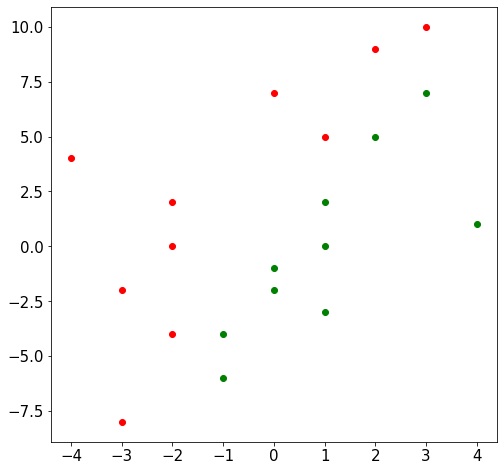

In [ ]:
plt.plot(X[0][y == 1],X[1][y == 1],'go')
plt.plot(X[0][y == -1],X[1][y == -1],'ro')
plt.show()

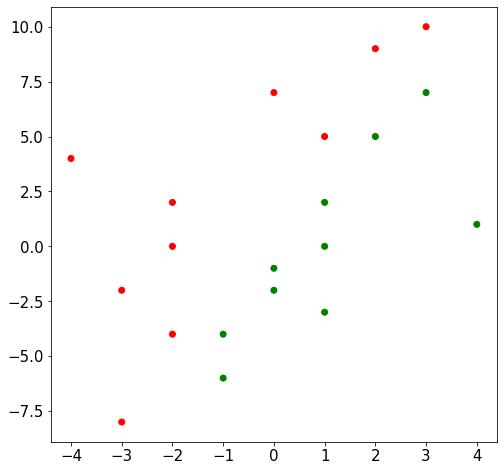

In [ ]:
color = np.array(["dummy","green","red"])
plt.scatter(X[0],X[1],c=color[y]);

### Linear Separability

Is there another way to determine linear separability?

In [ ]:
#YES::Use perceptron algorithm

w = np.zeros(X.shape[0])
i = 0
while not np.all(w @ X * y > 0):
    if i == X.shape[1]:
        i = 0
    if X[:,i] @ w * y[i] <= 0:
        w += X[:,i] * y[i]
    i += 1

print(w)

[ 6. -2.]


▶ Had the data been not linearly separable then this loop would have continued endlessly and not ended.

### Computing the Dual Objective

We shall follow a step-by-step approach to computing the dual objective function.

#### Step-1

Compute the object $\mathbf{Y}$ that appears in the dual problem.

In [ ]:
Y = np.diag(y)
print(Y)

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0

#### Step-2

Let $\boldsymbol{\alpha}$ be the dual variable. The dual objective is of the form:

$$
f(\boldsymbol{\alpha}) = \boldsymbol{\alpha}^T \mathbf{1} - \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha}
$$



Compute the matrix $\mathbf{Q}$ for this problem.


$$
Q = Y^TX^TXY
$$

In [ ]:
Q = Y.T @ X.T @ X @ Y
print(Q)

[[ 10   1   1 -18   6  17 -13  -5   3  11  21  14  16  25   8   2  -3 -10
   27 -21]
 [  1   1   4   3   0  -1   2   1   0  -1   0  -1   4  -2   2   2   3   2
   -3   3]
 [  1   4  17  19  -2 -10  13   6  -1  -8  -7  -9  12 -17   6   8  14  12
  -22  20]
 [-18   3  19  58 -14 -45  41  17  -7 -31 -49 -38 -16 -69  -8   6  23  34
  -79  65]
 [  6   0  -2 -14   4  12 -10  -4   2   8  14  10   8  18   4   0  -4  -8
   20 -16]
 [ 17  -1 -10 -45  12  37 -32 -13   6  25  42  31  20  56  10  -2 -15 -26
   63 -51]
 [-13   2  13  41 -10 -32  29  12  -5 -22 -35 -27 -12 -49  -6   4  16  24
  -56  46]
 [ -5   1   6  17  -4 -13  12   5  -2  -9 -14 -11  -4 -20  -2   2   7  10
  -23  19]
 [  3   0  -1  -7   2   6  -5  -2   1   4   7   5   4   9   2   0  -2  -4
   10  -8]
 [ 11  -1  -8 -31   8  25 -22  -9   4  17  28  21  12  38   6  -2 -11 -18
   43 -35]
 [ 21   0  -7 -49  14  42 -35 -14   7  28  49  35  28  63  14   0 -14 -28
   70 -56]
 [ 14  -1  -9 -38  10  31 -27 -11   5  21  35  26  16  47   8  -2

#### Step-3

Since `SciPy`'s optimization routines take the form of minimizing a function, we will recast $f$ as follows:

$$
f(\boldsymbol{\alpha}) =  \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

We now have to solve :

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad f(\boldsymbol{\alpha})
$$

Note that $\max$ changes to $\min$ since we changed the sign of the objective function.

In [ ]:
#Define the objective function
def f(alpha):
    return 0.5 * alpha.T @ Q @ alpha - alpha.sum()

### Optimize

Finally, we have most of the ingredients to solve the dual problem:

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

Find the optimal value, $\boldsymbol{\alpha^{*}}$.

In [ ]:
from scipy import optimize

alpha_initial = np.zeros(X.shape[1])
res = optimize.minimize(f, 
                  alpha_initial, 
                  bounds = optimize.Bounds(0,np.inf)
                )

res


      fun: -4.99999999958859
 hess_inv: <20x20 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.00006436e+00,  1.99998782e+00,  9.99992507e+00,  9.99782301e-01,
        1.00005106e+00,  2.00016723e+00, -1.53388414e-04, -6.50146607e-05,
        2.64677171e-05,  1.16173738e-04,  6.00018133e+00,  1.00014148e+00,
        1.50000542e+01,  2.00025791e+00,  7.00002669e+00,  4.99997528e+00,
        5.99991052e+00,  9.99871475e-01,  2.96385140e-04, -2.43627342e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 735
      nit: 30
     njev: 35
   status: 0
  success: True
        x: array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.64285525, 1.65714065, 1.67142753, 1.68571355,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.71428422, 1.62856756])

In [ ]:
alpha_star = res.x
alpha_star

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.64285525, 1.65714065, 1.67142753, 1.68571355,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.71428422, 1.62856756])

### Support vectors

Find all the support vectors.

Every support vectors lies on the supporting hyperplane. i.e 
$$
(w^*)^Tx = \pm1
$$

In [ ]:
X[:,alpha_star > 0]

array([[ 2,  1,  0, -1,  3, -3],
       [ 5,  2, -1, -4, 10, -8]])

### Optimal weight vector (Primal solution)

Find the optimal weight vector $\mathbf{w}^*$.

In [ ]:
w_star = X @ Y @ alpha_star
print(w_star)

[ 2.99998762 -1.00002588]


### Decision Boundary

Plot the decision boundary along with the supporting hyperplanes. Note where the support vectors lie in this plot.

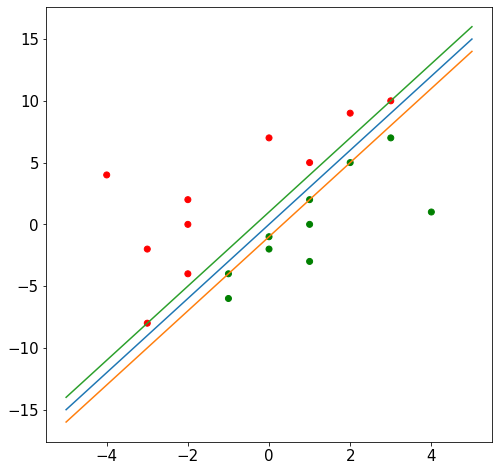

In [ ]:
color = np.array(["dummy","green","red"])
plt.scatter(X[0],X[1],c=color[y])
###########MODEL#####################
#w[0] * x + w[1] * y = 0

w = w_star

x = np.linspace(-5,5)
y = -w[0] / w[1] * x
plt.plot(x,y)
##########SUPPORTING HYPERPLANES###########
y = -w[0] / w[1] * x + 1 / w[1]
plt.plot(x,y)

y = -w[0] / w[1] * x - 1 / w[1]
plt.plot(x,y)

plt.show()

## Soft-margin SVM

We now turn to soft-margin SVMs. Adapt the hard-margin code that you have written for the soft-margin problem. The only change you have to make is to introduce an upper bound for $\boldsymbol{\alpha}$, which is the hyperparameter $C$.


In [ ]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8],
             [0, 0], [2, 7]]).T
y = np.array([1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1, 
             -1, -1, -1, -1, -1,
              1, 1])

### Relationship between $C$ and margin

Plot the decision boundary and the supporting hyperplane for the following values of $C$.

(1) $C = 0.01$

(2) $C = 0.1$

(3) $C = 1$

(4) $C = 10$

Plot all of them in a $2 \times 2$ subplot. Study the tradeoff between the following quantities:

(1) Width of the margin.

(2) Number of points that lie within the margin or on the wrong side. This is often called **margin violation**.


In [ ]:
Y = np.diag(y)

Q = Y.T @ X.T @ X @ Y

def f(alpha):
    return 0.5 * alpha @ Q @ alpha - alpha.sum()


In [ ]:
def Plot(X,y,w_star, C):
    color = np.array(["dummy","green","red"])
    plt.scatter(X[0],X[1],c=color[y])
    ###########MODEL#####################
    #w[0] * x + w[1] * y = 0
    w = w_star
    x = np.linspace(-5,5)
    y = -w[0] / w[1] * x
    plt.plot(x,y)
    ##########SUPPORTING HYPERPLANES###########
    y = -w[0] / w[1] * x + 1 / w[1]
    plt.plot(x,y)

    y = -w[0] / w[1] * x - 1 / w[1]
    plt.plot(x,y)
    plt.title(f'C = {C}')
    return

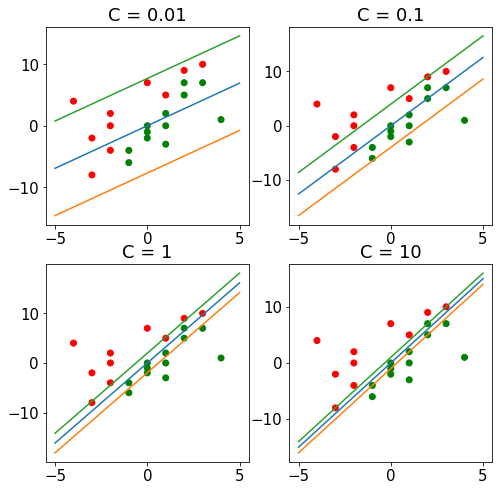

In [ ]:
sub_plot = 1
for C in [0.01, 0.1, 1, 10]:
    plt.subplot(2,2,sub_plot)
    sub_plot += 1

    alpha_initial = np.zeros(X.shape[1])
    res = optimize.minimize(f, 
                  alpha_initial, 
                  bounds = optimize.Bounds(0,C)
                )
    alpha_star = res.x
    w_star = X @ Y @ alpha_star
    Plot(X,y,w_star, C)


### Support vectors

For $C = 10$, study the number of support vectors that the model has.

In [ ]:
alpha_initial = np.zeros(X.shape[1])
res = optimize.minimize(f, 
                  alpha_initial, 
                  bounds = optimize.Bounds(0,10)
                )
alpha_star = res.x
w_star = X @ Y @ alpha_star

In [ ]:
w_star

array([ 2.99997405, -0.99999339])

In [ ]:
X[:,alpha_star > 0]

array([[ 2,  1,  0, -1,  3, -3,  0,  2],
       [ 5,  2, -1, -4, 10, -8,  0,  7]])